
<br><br>

### Considere o dataset abaixo:

In [18]:
import pandas as pd
from google.colab import files
uploaded = files.upload()


Saving dataframe_exercicio_modulo_8.csv to dataframe_exercicio_modulo_8 (1).csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['dataframe_exercicio_modulo_8.csv']))
print(df.shape)
df.head()

(2460, 5)


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47


Descrição das variáveis:

ind_pop_cid = índice entre 1 e 5, indicando o tamanho da população de uma cidade; quanto maior o índice, maior a cidadel;

perc_pol = percentual de policiais ativos na cidade;

taxa_crim = taxa de criminalidade histórica da cidade;

nivel_ed = nível educacional médio da cidade;

crimes = quantidade de crimes registrados no mês vigente;

<br>
<br>

# Exercícios

<br>

## Parte 1:

Os exercícios abaixo tratarão a respeito da criação de modelos de aprendizado de máquina. Vimos que precisamos controlar o overfitting dos modelos e medir a capacidade de generalização dos mesmos. Para isso, é interessante termos os dados disponíveis divididos em treino/validação/teste. 

#### Crie uma função para fazer a divisão de treino/teste.

Esta função deve ter dois parâmetros de entrada:

    1- dataframe disponível;
    2- percentual do dataset que será disponibilizado para os dados de teste;
    
e deve retornar dois dataframes.

(__Exemplo:__ Se o dataframe disponível possui 100 linhas e queremos 25% dos dados para teste, então a função deve retornar dois dataframes, um com 75 linhas (o dataset de treino) e outro com as 25 linhas restantes (o dataset de teste).)



## Parte 2:

### 1 - 

Usando __apenas UMA variável__, crie modelos de aprendizado de máquina para prever a quantidade de crimes a partir desta única variável. Justifique a escolha desta variável.

Instancie vários modelos e compare-os de acordo com as métricas de performance. Indique quais modelos estão sofrendo overfitting. 

### 2 - 

Agora, usando todas as variáveis disponíveis, refaça as análises do primeiro exercício e compare os resultados.



**Parte 1**

divisão do dataframe em 2 partes

percentual do dataset que será disponibilizado para os dados de teste: 25%

---




In [4]:
from sklearn.model_selection import train_test_split

In [5]:
def divide_df(df,p):
  train, test = train_test_split(df, test_size=p)
  return train, test

In [11]:
train,test = divide_df(df,0.25)

In [91]:
print(train)

      ind_pop_cid   perc_pol  taxa_crim  nivel_ed  crimes
185           3.0  17.834031  77.602376       7.0     211
258           5.0  10.332694  10.858127       6.0      49
100           3.0  14.008826  25.882120       5.0      43
249           2.0  14.181415  64.881377       9.0     201
1595          2.0  32.116428  95.717924       1.0     188
...           ...        ...        ...       ...     ...
656           3.0  15.043280  61.823578       2.0     265
2345          2.0   9.527007  97.187884       3.0     402
1804          3.0   0.707454  51.027935       7.0     206
470           5.0  36.746923  76.891661       1.0      72
1298          5.0  12.191611  60.886994       1.0     306

[1845 rows x 5 columns]


In [13]:
print(test)

      ind_pop_cid   perc_pol  taxa_crim  nivel_ed  crimes
1815          3.0   2.440825  45.364139       5.0     149
1847          5.0  11.404526  26.364947       6.0      28
1061          2.0   8.233086  90.055166       3.0     407
1049          3.0  11.957026  68.480098       3.0     272
1639          5.0   3.119551  44.436418       9.0     160
...           ...        ...        ...       ...     ...
1088          2.0  29.964301  85.057121       7.0      56
1036          2.0  11.941626  31.295252       2.0     122
495           2.0   3.558430  58.904730       3.0     246
915           3.0  25.681762  78.272624       4.0     171
137           2.0  18.846432  57.671676      10.0      42

[615 rows x 5 columns]


**Parte 2**

1 - Usando __apenas UMA variável__, crie modelos de aprendizado de máquina para prever a quantidade de crimes a partir desta única variável. Justifique a escolha desta variável.

Variável escolhida: percentual de policiais ativos
Justificativa: parece haver uma relação entre o policiamento e um aumento ou uma diminuíção no número de crimes.

Instancie vários modelos e compare-os de acordo com as métricas de performance. Indique quais modelos estão sofrendo overfitting. 

In [95]:
import matplotlib.pyplot as plt

In [96]:
import seaborn as sns

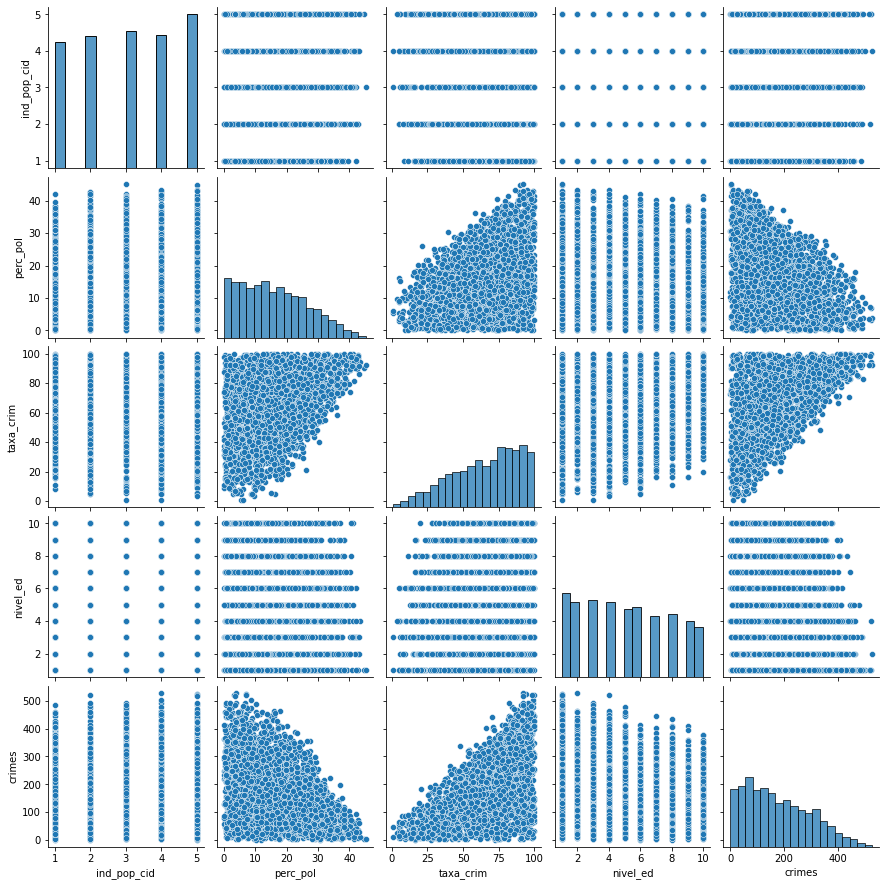

In [21]:
sns.pairplot(df)

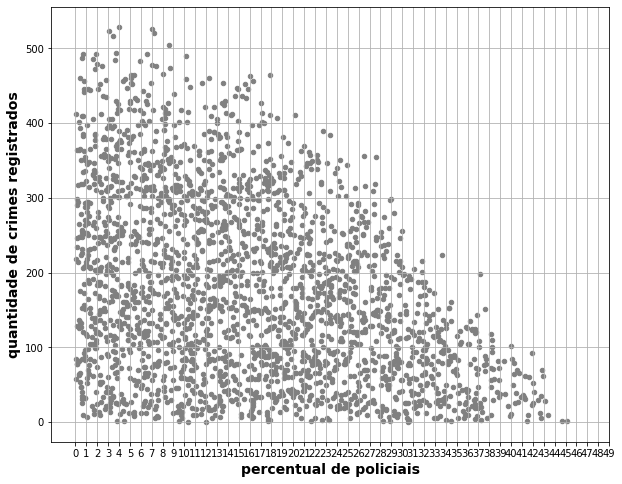

In [39]:
plt.figure(figsize=[10,8])
plt.scatter(df['perc_pol'], df['crimes'], s = 20, c = 'gray')
plt.xlabel("percentual de policiais", fontweight = 'bold', fontsize = 14)
plt.ylabel("quantidade de crimes registrados", fontweight = 'bold', fontsize = 14)
plt.xticks(range(0,50))
plt.grid()
plt.show()

In [15]:
def funcao_linear(x, theta0, theta1):
    pred = theta0 + theta1 * x
    pred.name = None
    return pred

In [52]:
X = train['perc_pol']
X

185     17.834031
258     10.332694
100     14.008826
249     14.181415
1595    32.116428
          ...    
656     15.043280
2345     9.527007
1804     0.707454
470     36.746923
1298    12.191611
Name: perc_pol, Length: 1845, dtype: float64

In [53]:
y = train['crimes']
y

185     211
258      49
100      43
249     201
1595    188
       ... 
656     265
2345    402
1804    206
470      72
1298    306
Name: crimes, Length: 1845, dtype: int64

In [42]:
y_pred = funcao_linear(X, theta0 = 2000, theta1 = 700)
y_pred

185     14483.821856
258      9232.886131
100     11806.178076
249     11926.990205
1595    24481.499762
            ...     
656     12530.296305
2345     8668.904928
1804     2495.217749
470     27722.846373
1298    10534.127480
Length: 1845, dtype: float64

In [54]:
import numpy as np
def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

In [55]:
y1 = funcao_linear(X, theta0 = 1000, theta1 = 300)
y2 = funcao_linear(X, theta0 = 2000, theta1 = 700)
y3 = funcao_linear(X, theta0 = 5000, theta1 = -250)

RMSE_1 = RMSE(y = df['crimes'], y_pred = y1)
RMSE_2 = RMSE(y = df['crimes'], y_pred = y2)
RMSE_3 = RMSE(y = df['crimes'], y_pred = y3)

print("Os respectivos RMSE de cada modelo são: ")
print('Modelo 1: ', RMSE_1)
print('Modelo 2: ', RMSE_2)
print('Modelo 3: ', RMSE_3)

Os respectivos RMSE de cada modelo são: 
Modelo 1:  6443.094963120354
Modelo 2:  14918.130718837348
Modelo 3:  2700.2927147543596


O melhor modelo seria o modelo 3

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
#instanciando o algoritmo

lm = LinearRegression()
lm

LinearRegression()

In [58]:
type(X), type(y)

(pandas.core.series.Series, pandas.core.series.Series)

In [59]:
#ajustando os dados para o formato correto  

X = X.values.reshape(-1,1)
type(X), X.shape

(numpy.ndarray, (1845, 1))

In [60]:
y = y.values.reshape(-1,1)
type(y), y.shape

(numpy.ndarray, (1845, 1))

In [61]:
#fitando - treinando - o modelo aos dados

lm.fit(X, y)

LinearRegression()

In [62]:
#fazendo predições

ypred = lm.predict(X)
ypred

array([[168.79510864],
       [200.52164746],
       [184.97362877],
       ...,
       [241.23113405],
       [ 88.80395139],
       [192.65945178]])

Abaixo, calculamos o RMSE para o modelo de regressão de liner simples, bem como vemos a reta criada a partir do modelo.

Na sequência, comparamos a reta do MRLS com as outras retas que havíamos criado antes.

In [63]:
RMSE(y = y, y_pred = ypred)

111.45060200659647

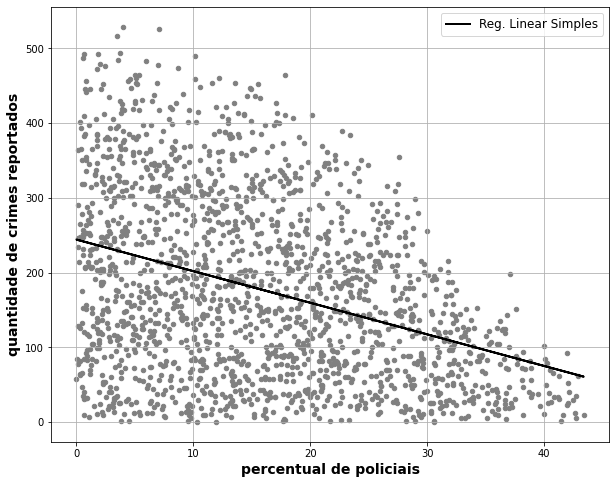

In [66]:
plt.figure(figsize=[10,8])
plt.scatter(train['perc_pol'], train['crimes'], s = 20, c = 'gray')
plt.xlabel("percentual de policiais", fontweight = 'bold', fontsize = 14)
plt.ylabel("quantidade de crimes reportados", fontweight = 'bold', fontsize = 14)
plt.grid()

lm_preds = lm.predict(X)
plt.plot(X, lm_preds, c = 'black', lw = 2, label = 'Reg. Linear Simples')
plt.legend(fontsize = 12)
plt.show()

**KNN**

In [68]:
from sklearn.neighbors import KNeighborsRegressor

In [65]:
X = train['perc_pol'].values.reshape(-1,1)
y = train['crimes'].values

In [67]:
lm

LinearRegression()

In [69]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X, y)
print("RMSE do KNN com 5 vizinhos: ", RMSE(y = y, y_pred = knn.predict(X)))

RMSE do KNN com 5 vizinhos:  99.36475609282968


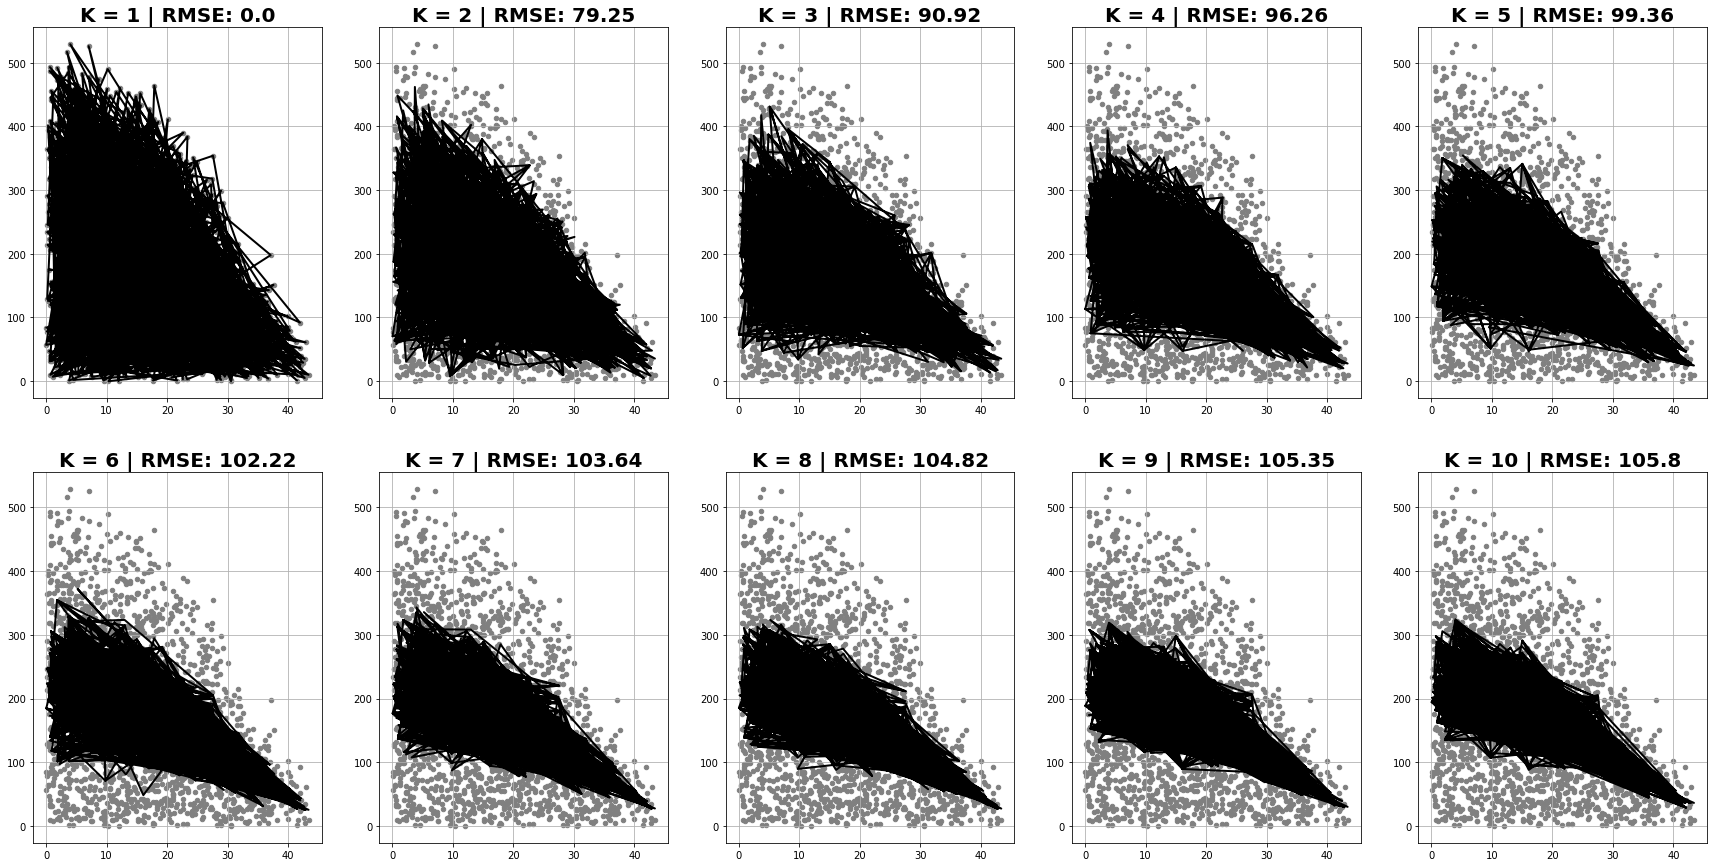

In [71]:
plt.figure(figsize=[30,15])

for i in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors = i).fit(X, y)
    rmse_knn = np.round(RMSE(y = y, y_pred = knn.predict(X)), 2)
    
    plt.subplot(2,5,i)
    plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
    plt.plot(X, knn.predict(X), c = 'black', lw = 2)
    plt.scatter(train['perc_pol'], train['crimes'], s = 20, c = 'gray')
    plt.grid()

plt.show()

Agora, a fim de estudarmos overfitting e a capacidade de generalização de um algoritmo de machine learning, vamos seguir os passos:

1 - Instanciar alguns modelos:

- Regressão Linear Simples

- KNN(K = 1)

- KNN(K = 6)

- KNN(K = 12)
2 - fitar esses modelos no dataset original (dataset de treino);

3 - plotar a curva aprendida por cada modelo no dataset de treino e avaliar o RMSE; analogamente, fazer o mesmo para o dataset novo: desta forma conseguimos comparar os resultados dos modelos nos dados de treino e em dados novos ("dados não vistos pelo modelo") a fim de analisar o overfitting e a capacidade de generalização dos modelos.

In [75]:
def plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo):
    
    modelo.fit(X, y)
    
    predicao_dataset_treino = modelo.predict(X)
    predicao_dataset_novo = modelo.predict(Xnovo)
    
    rmse_dataset_treino = np.round(RMSE(y = y, y_pred = predicao_dataset_treino), 2)
    rmse_dataset_novo = np.round(RMSE(y = ynovo, y_pred = predicao_dataset_novo), 2)
    
    plt.figure(figsize = [20,6])
    plt.subplot(1,2,1)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET TREINO: " + str(rmse_dataset_treino),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(X, y, c = 'gray', s = 20)
    plt.plot(X, predicao_dataset_treino, c = 'blue', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.subplot(1,2,2)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET NOVO: " + str(rmse_dataset_novo),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(Xnovo, ynovo, c = 'gray', s = 20)
    plt.plot(Xnovo, predicao_dataset_novo, c = 'blue', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.show()

In [76]:
X = train['perc_pol'].values.reshape(-1,1)
y = train['crimes'].values
Xnovo = test['perc_pol'].values.reshape(-1,1)
ynovo = test['crimes'].values

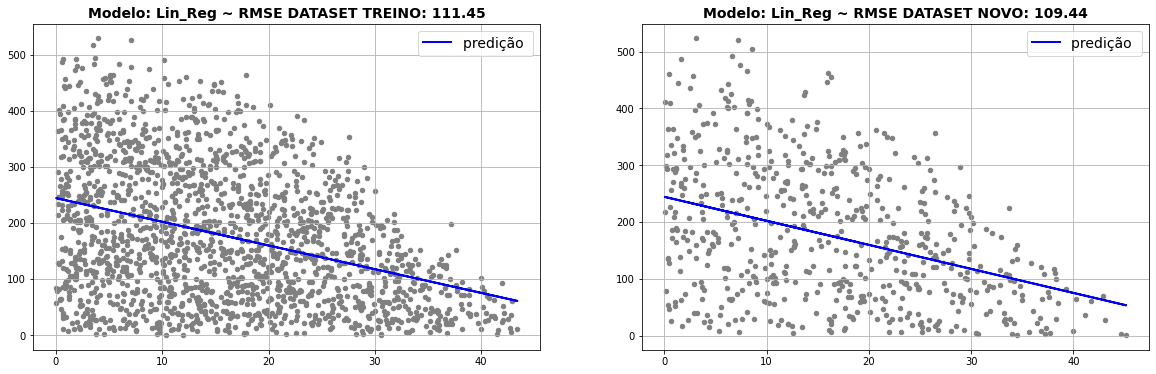

In [77]:
modelo = LinearRegression()
nome_modelo = 'Lin_Reg'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

No caso da regressão linear, vemos uma leve variação do RMSE no dataset de teste, mas os valores são similares.

Além disso, fica evidente que a reta de regressão ainda descreve os dados de teste, mesmo tendo sido treinada apenas no dataset de treinamento.

Abaixo, iremos analisar os resultados para versões do KNN - Regressor

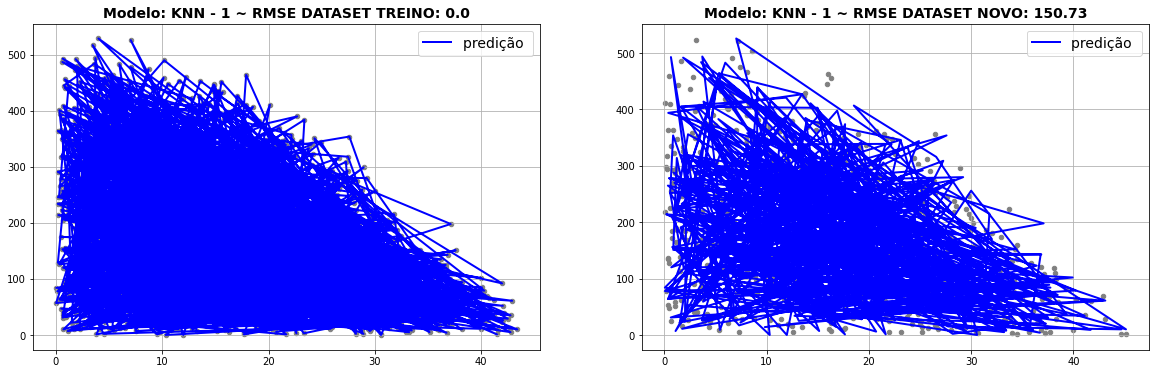

In [86]:
modelo = KNeighborsRegressor(n_neighbors = 1)
nome_modelo = 'KNN - 1'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

Considerando apenas 1 vizinho, fica evidente que o KNN(K=1) não generalizou bem.

O nível de erro em treino foi 0, mas teve um alto nível de erro no dataset de teste.

Neste caso em particular, dizemos que o modelo KNN(K=1) está sofrendo de overfitting: o erro de treinamento é muito baixo, mas o erro em dados ainda não vistos (dataset de teste) é muito alto, comparado com o erro de treinamento.

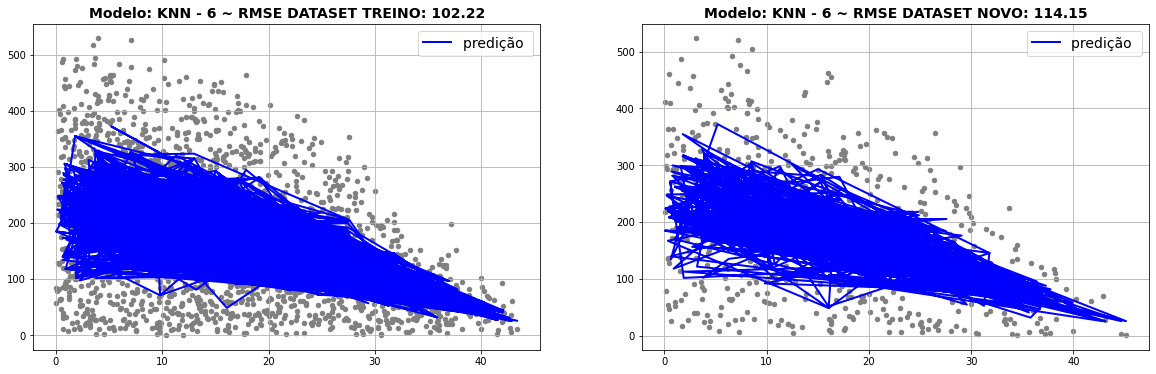

In [79]:
modelo = KNeighborsRegressor(n_neighbors = 6)
nome_modelo = 'KNN - 6'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

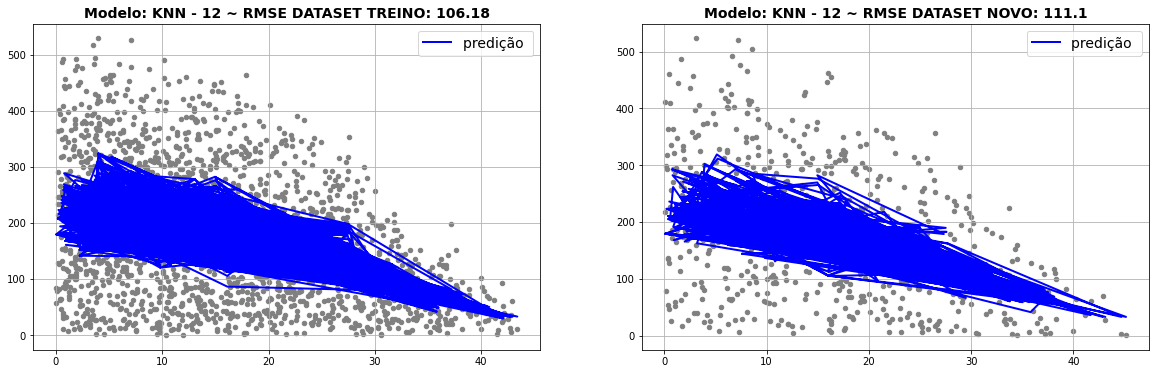

In [85]:
modelo = KNeighborsRegressor(n_neighbors = 12)
nome_modelo = 'KNN - 12'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

KNN(K=12) está sofrendo de underfitting

### 2 - 

Agora, usando todas as variáveis disponíveis, refaça as análises do primeiro exercício e compare os resultados.


In [97]:
import numpy as np


In [111]:
lm = LinearRegression()
lm

LinearRegression()

In [112]:
X = train[['ind_pop_cid','perc_pol','taxa_crim','nivel_ed']].values
X

array([[ 3.        , 17.83403122, 77.60237567,  7.        ],
       [ 5.        , 10.33269447, 10.85812687,  6.        ],
       [ 3.        , 14.00882582, 25.88211976,  5.        ],
       ...,
       [ 3.        ,  0.70745393, 51.02793517,  7.        ],
       [ 5.        , 36.74692339, 76.89166148,  1.        ],
       [ 5.        , 12.19161069, 60.88699392,  1.        ]])

In [114]:
y = np.c_[train['crimes'], train['crimes'], train['crimes'], train['crimes']]
y

array([[211, 211, 211, 211],
       [ 49,  49,  49,  49],
       [ 43,  43,  43,  43],
       ...,
       [206, 206, 206, 206],
       [ 72,  72,  72,  72],
       [306, 306, 306, 306]])

In [87]:
#instanciando o algoritmo

lm = LinearRegression()
lm

LinearRegression()

In [115]:
lm.fit(X, y)

LinearRegression()

In [116]:
ypred = lm.predict(X)
ypred

array([[193.94613552, 193.94613552, 193.94613552, 193.94613552],
       [-16.18183419, -16.18183419, -16.18183419, -16.18183419],
       [ 11.21285249,  11.21285249,  11.21285249,  11.21285249],
       ...,
       [219.13495832, 219.13495832, 219.13495832, 219.13495832],
       [133.50177765, 133.50177765, 133.50177765, 133.50177765],
       [274.06142529, 274.06142529, 274.06142529, 274.06142529]])

In [117]:
RMSE(y = y, y_pred = ypred)

37.238764061953134

In [118]:
X = test[['ind_pop_cid','perc_pol','taxa_crim','nivel_ed']].values
X

array([[ 3.        ,  2.44082468, 45.36413918,  5.        ],
       [ 5.        , 11.40452552, 26.36494716,  6.        ],
       [ 2.        ,  8.23308616, 90.05516573,  3.        ],
       ...,
       [ 2.        ,  3.55842968, 58.90473019,  3.        ],
       [ 3.        , 25.68176204, 78.27262379,  4.        ],
       [ 2.        , 18.84643227, 57.67167638, 10.        ]])

In [120]:
y = np.c_[test['crimes'], test['crimes'], test['crimes'], test['crimes']]
y

array([[149, 149, 149, 149],
       [ 28,  28,  28,  28],
       [407, 407, 407, 407],
       ...,
       [246, 246, 246, 246],
       [171, 171, 171, 171],
       [ 42,  42,  42,  42]])

In [121]:
lm.fit(X, y)

LinearRegression()

In [122]:
ypred = lm.predict(X)
ypred

array([[204.96441054, 204.96441054, 204.96441054, 204.96441054],
       [ 44.58825241,  44.58825241,  44.58825241,  44.58825241],
       [383.16019137, 383.16019137, 383.16019137, 383.16019137],
       ...,
       [276.6969967 , 276.6969967 , 276.6969967 , 276.6969967 ],
       [170.0336983 , 170.0336983 , 170.0336983 , 170.0336983 ],
       [ 33.13976268,  33.13976268,  33.13976268,  33.13976268]])

In [123]:
RMSE(y = y, y_pred = ypred)

35.16070563253012

No caso da regressão linear, vemos uma leve variação do RMSE entre o dataset de treino e de teste, mas os valores são similares, sendo de 37,24 e 35,16 respectivamente. Ao analisarmos quantitativamente os valores de RMSE em treino e no dataset de teste, podemos então afirmar que está generalizando bem.
